In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
data = pd.read_csv('tripv2pub.csv')
data.head()

,HOUSEID,PERSONID,TRIPID,SEQ_TRIPID,VEHCASEID,FRSTHM,PARK,HHMEMDRV,TDWKND,TRAVDAY,...,WORKER,DRIVER,R_RACE,R_HISP,PROXY,EDUC,PRMACT,R_SEX_IMP,VEHTYPE,HHFAMINC_IMP
0,9000013002,1,1,1,900001300201,1,2,1,1,1,...,2,1,1,2,1,7,3,2,3,11
1,9000013002,1,2,2,900001300201,1,2,1,1,1,...,2,1,1,2,1,7,3,2,3,11
2,9000013002,2,1,1,900001300202,1,-1,1,1,1,...,1,1,1,2,2,7,-1,1,3,11
3,9000013002,2,2,2,900001300202,1,-1,1,1,1,...,1,1,1,2,2,7,-1,1,3,11
4,9000013002,2,3,3,900001300202,1,-1,1,1,1,...,1,1,1,2,2,7,-1,1,3,11


In [3]:
data.shape


(31074, 85)

In [4]:
# autocorrelation_plot(data)
# pyplot.show()

In [6]:
df = data[['URBRUR','URBANSIZE','TRAVDAY','TDAYDATE','STRTTIME','ENDTIME','TRPMILES','VEHID']]
df.head()


,URBRUR,URBANSIZE,TRAVDAY,TDAYDATE,STRTTIME,ENDTIME,TRPMILES,VEHID
0,1,4,1,202202,1435,1450,3.902424,1
1,1,4,1,202202,1605,1615,3.902424,1
2,1,4,1,202202,700,730,17.077067,2
3,1,4,1,202202,740,750,4.748291,2
4,1,4,1,202202,800,830,14.098819,2


In [7]:
df.shape

(31074, 8)

In [9]:
df2 = pd.read_csv('perv2pub.csv')
df2 = df2[['WRKTRANS']]
df2.head()

,WRKTRANS
0,-1
1,-1
2,-1
3,-1
4,1


In [10]:
data = pd.concat([df,df2],axis=1)
data.head()
print(data.dtypes)

URBRUR         int64
URBANSIZE      int64
TRAVDAY        int64
TDAYDATE       int64
STRTTIME       int64
ENDTIME        int64
TRPMILES     float64
VEHID          int64
WRKTRANS     float64
dtype: object


In [134]:
# for column in data.columns:
#   unique_values = data[column].unique()
#   print(f"Column '{column}': {unique_values}")

# **Data Preprocessing**

**Handling Missing Values**

In [11]:
print('Shape before handling missing values',data.shape)
data['WRKTRANS'] = data['WRKTRANS'].replace(-1.0, pd.NA)
print(data.head())

# Fill missing values in 'WRKTRANS' with the mode (most frequent value)
wrkt_mode = data['WRKTRANS'].mode()[0]
data['WRKTRANS'].fillna(wrkt_mode, inplace=True)

# Display the data after imputing missing values
print(data.head())

print('Shape after handling missing values',data.shape)

Shape before handling missing values (31074, 9)
   URBRUR  URBANSIZE  TRAVDAY  TDAYDATE  STRTTIME  ENDTIME   TRPMILES  VEHID  \
0       1          4        1    202202      1435     1450   3.902424      1   
1       1          4        1    202202      1605     1615   3.902424      1   
2       1          4        1    202202       700      730  17.077067      2   
3       1          4        1    202202       740      750   4.748291      2   
4       1          4        1    202202       800      830  14.098819      2   

  WRKTRANS  
0     <NA>  
1     <NA>  
2     <NA>  
3     <NA>  
4      1.0  
   URBRUR  URBANSIZE  TRAVDAY  TDAYDATE  STRTTIME  ENDTIME   TRPMILES  VEHID  \
0       1          4        1    202202      1435     1450   3.902424      1   
1       1          4        1    202202      1605     1615   3.902424      1   
2       1          4        1    202202       700      730  17.077067      2   
3       1          4        1    202202       740      750   4.748291    

/var/folders/dh/scd7rd5x5kq171g7vm_bkv7m0000gn/T/ipykernel_90705/2503809284.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['WRKTRANS'].fillna(wrkt_mode, inplace=True)
/var/folders/dh/scd7rd5x5kq171g7vm_bkv7m0000gn/T/ipykernel_90705/2503809284.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['W

In [12]:
print('Shape before handling missing values',data.shape)
data = data.dropna()
print('Shape after handling missing values',data.shape)

Shape before handling missing values (31074, 9)
Shape after handling missing values (31074, 9)


In [13]:
data['STRTDATETIME_UNIX'] = data['TDAYDATE'] + data['STRTTIME']
data['ENDDATETIME_UNIX'] = data['TDAYDATE'] + data['ENDTIME']
print(data.dtypes)

URBRUR                 int64
URBANSIZE              int64
TRAVDAY                int64
TDAYDATE               int64
STRTTIME               int64
ENDTIME                int64
TRPMILES             float64
VEHID                  int64
WRKTRANS             float64
STRTDATETIME_UNIX      int64
ENDDATETIME_UNIX       int64
dtype: object


In [14]:
# Convert TDAYDATE to datetime format representing YearMonth and then to YYYY-MM
data['TDAYDATE'] = pd.to_datetime(data['TDAYDATE'].astype(str), format='%Y%m').dt.strftime('%Y-%m')

# Display the data to check the conversion
print(data.head())

   URBRUR  URBANSIZE  TRAVDAY TDAYDATE  STRTTIME  ENDTIME   TRPMILES  VEHID  \
0       1          4        1  2022-02      1435     1450   3.902424      1   
1       1          4        1  2022-02      1605     1615   3.902424      1   
2       1          4        1  2022-02       700      730  17.077067      2   
3       1          4        1  2022-02       740      750   4.748291      2   
4       1          4        1  2022-02       800      830  14.098819      2   

   WRKTRANS  STRTDATETIME_UNIX  ENDDATETIME_UNIX  
0       1.0             203637            203652  
1       1.0             203807            203817  
2       1.0             202902            202932  
3       1.0             202942            202952  
4       1.0             203002            203032  


In [15]:
def convert_to_time_format(time_int):
    time_str = str(time_int).zfill(4)  # Convert to string and pad with zeros
    return time_str[:2] + ':' + time_str[2:]  # Insert colon between hours and minutes

# Apply the conversion function to STRTTIME and ENDTIME columns
data['STRTTIME'] = data['STRTTIME'].apply(convert_to_time_format)
data['ENDTIME'] = data['ENDTIME'].apply(convert_to_time_format)
print(data.head())


   URBRUR  URBANSIZE  TRAVDAY TDAYDATE STRTTIME ENDTIME   TRPMILES  VEHID  \
0       1          4        1  2022-02    14:35   14:50   3.902424      1   
1       1          4        1  2022-02    16:05   16:15   3.902424      1   
2       1          4        1  2022-02    07:00   07:30  17.077067      2   
3       1          4        1  2022-02    07:40   07:50   4.748291      2   
4       1          4        1  2022-02    08:00   08:30  14.098819      2   

   WRKTRANS  STRTDATETIME_UNIX  ENDDATETIME_UNIX  
0       1.0             203637            203652  
1       1.0             203807            203817  
2       1.0             202902            202932  
3       1.0             202942            202952  
4       1.0             203002            203032  


In [16]:
data['STRTDATETIME'] = pd.to_datetime(data['TDAYDATE'] + ' ' + data['STRTTIME'])
data['ENDDATETIME'] = pd.to_datetime(data['TDAYDATE'] + ' ' + data['ENDTIME'])
data['STRTDATETIME'] = data['STRTDATETIME'].dt.strftime('%Y-%m %H:%M')
data['ENDDATETIME'] = data['ENDDATETIME'].dt.strftime('%Y-%m %H:%M')
print(data.head())

/var/folders/dh/scd7rd5x5kq171g7vm_bkv7m0000gn/T/ipykernel_90705/2057339650.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['STRTDATETIME'] = pd.to_datetime(data['TDAYDATE'] + ' ' + data['STRTTIME'])
/var/folders/dh/scd7rd5x5kq171g7vm_bkv7m0000gn/T/ipykernel_90705/2057339650.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['ENDDATETIME'] = pd.to_datetime(data['TDAYDATE'] + ' ' + data['ENDTIME'])


   URBRUR  URBANSIZE  TRAVDAY TDAYDATE STRTTIME ENDTIME   TRPMILES  VEHID  \
0       1          4        1  2022-02    14:35   14:50   3.902424      1   
1       1          4        1  2022-02    16:05   16:15   3.902424      1   
2       1          4        1  2022-02    07:00   07:30  17.077067      2   
3       1          4        1  2022-02    07:40   07:50   4.748291      2   
4       1          4        1  2022-02    08:00   08:30  14.098819      2   

   WRKTRANS  STRTDATETIME_UNIX  ENDDATETIME_UNIX   STRTDATETIME    ENDDATETIME  
0       1.0             203637            203652  2022-02 14:35  2022-02 14:50  
1       1.0             203807            203817  2022-02 16:05  2022-02 16:15  
2       1.0             202902            202932  2022-02 07:00  2022-02 07:30  
3       1.0             202942            202952  2022-02 07:40  2022-02 07:50  
4       1.0             203002            203032  2022-02 08:00  2022-02 08:30  


In [17]:
data.set_index(data['STRTDATETIME'], inplace=True)
data.head()

,URBRUR,URBANSIZE,TRAVDAY,TDAYDATE,STRTTIME,ENDTIME,TRPMILES,VEHID,WRKTRANS,STRTDATETIME_UNIX,ENDDATETIME_UNIX,STRTDATETIME,ENDDATETIME
STRTDATETIME,,,,,,,,,,,,,
2022-02 14:35,1,4,1,2022-02,14:35,14:50,3.902424,1,1.0,203637,203652,2022-02 14:35,2022-02 14:50
2022-02 16:05,1,4,1,2022-02,16:05,16:15,3.902424,1,1.0,203807,203817,2022-02 16:05,2022-02 16:15
2022-02 07:00,1,4,1,2022-02,07:00,07:30,17.077067,2,1.0,202902,202932,2022-02 07:00,2022-02 07:30
2022-02 07:40,1,4,1,2022-02,07:40,07:50,4.748291,2,1.0,202942,202952,2022-02 07:40,2022-02 07:50
2022-02 08:00,1,4,1,2022-02,08:00,08:30,14.098819,2,1.0,203002,203032,2022-02 08:00,2022-02 08:30


# **Exploratory Data Analysis(EDA)**

In [18]:
plt.figure(figsize=(15,6))
plt.plot(data.index,data['TRPMILES'],label='Miles Travled')
plt.title('Miles traveled over time')
plt.xlabel('Time')
plt.ylabel('Miles')
plt.legend()
plt.show()

KeyboardInterrupt: 

# **Data Preprocessing part 2**

In [19]:
start_time_series = data['STRTDATETIME']
end_time_series = data['ENDDATETIME']
trpmiles_series = data['TRPMILES']
start_time_series.head()

STRTDATETIME
2022-02 14:35    2022-02 14:35
2022-02 16:05    2022-02 16:05
2022-02 07:00    2022-02 07:00
2022-02 07:40    2022-02 07:40
2022-02 08:00    2022-02 08:00
Name: STRTDATETIME, dtype: object

In [20]:
data.dtypes

URBRUR                 int64
URBANSIZE              int64
TRAVDAY                int64
TDAYDATE              object
STRTTIME              object
ENDTIME               object
TRPMILES             float64
VEHID                  int64
WRKTRANS             float64
STRTDATETIME_UNIX      int64
ENDDATETIME_UNIX       int64
STRTDATETIME          object
ENDDATETIME           object
dtype: object

ADF Statistic: -40.33971165518408
p-value: 0.0
Critical Values:
	1%: -3.430560561851238
	5%: -2.8616330627632154
	10%: -2.566819534448655


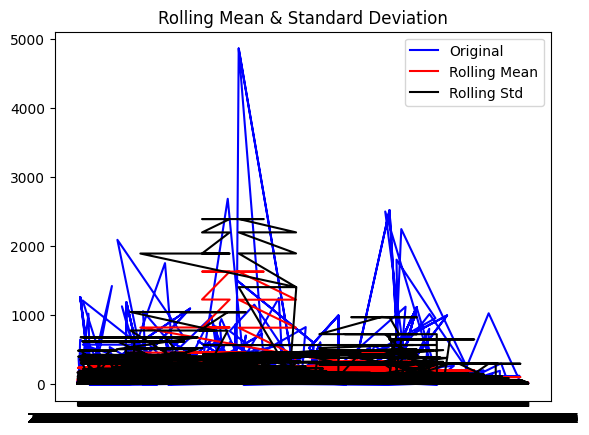

In [22]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(ts):
    # Example ADF test
    result = adfuller(ts)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

    # Plotting rolling statistics
    rolling_mean = ts.rolling(window=12).mean()
    rolling_std = ts.rolling(window=12).std()

    plt.plot(ts, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

# Example: Check stationarity for TRPMILES
check_stationarity(data['TRPMILES'])

# **Model Building**

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Define the order of the ARIMA model (p, d, q)
p = 1
d = 1
q = 1

# Fit ARIMA model (example: TRPMILES time series)
model = ARIMA(data['TRPMILES'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model

                               SARIMAX Results                                
Dep. Variable:               TRPMILES   No. Observations:                31074
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -181821.661
Date:                Thu, 20 Jun 2024   AIC                         363649.322
Time:                        23:53:44   BIC                         363674.354
Sample:                             0   HQIC                        363657.340
                              - 31074                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1117      0.001   -214.297      0.000      -0.113      -0.111
ma.L1         -0.8042      0.000  -2769.063      0.000      -0.805      -0.804
sigma2      7079.4461      3.023   2342.184      0.0

In [43]:


# Drop any duplicates in column names
data = data.loc[:, ~data.columns.duplicated()]

# Convert datetime columns to integer for ARIMA modeling
data['STRTDATETIME_int'] = data['STRTDATETIME'].astype(np.int64) // 10**9
data['ENDDATETIME_int'] = data['ENDDATETIME'].astype(np.int64) // 10**9

In [44]:
# Define the p, d, q parameters to take any value between 0 and 3
p = q = range(0, 4)
d = range(0, 2)
pdq = [(x, y, z) for x in p for y in d for z in q]

def get_best_arima_model(series):
    best_aic = float('inf')
    best_order = None
    best_model = None

    for param in pdq:
        try:
            model = ARIMA(series, order=param)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = param
                best_model = results
        except:
            continue

    print(f'Best ARIMA parameters: {best_order} with AIC: {best_aic}')
    return best_model

# Get the best ARIMA models
best_model_trpmiles = get_best_arima_model(data['TRPMILES'].dropna())
best_model_strttime = get_best_arima_model(data['STRTDATETIME_int'].dropna())
best_model_endtime = get_best_arima_model(data['ENDDATETIME_int'].dropna())


Best ARIMA parameters: (3, 0, 3) with AIC: 360297.64331401256
Best ARIMA parameters: (3, 0, 3) with AIC: 949194.4338789851
Best ARIMA parameters: (3, 0, 3) with AIC: 949195.0308956441


In [38]:
data['STRTDATETIME'] = pd.to_datetime(data['STRTDATETIME'], unit='ns')
data['ENDDATETIME'] = pd.to_datetime(data['ENDDATETIME'], unit='ns')


In [53]:
# Forecasting future values
forecast_steps = 10  # Number of steps to forecast

forecast_trpmiles = best_model_trpmiles.forecast(steps=forecast_steps)
forecast_strttime = best_model_strttime.forecast(steps=forecast_steps)
forecast_endtime = best_model_endtime.forecast(steps=forecast_steps)

# Convert forecasted datetime values back to datetime, rounded to the nearest second
forecasted_strttime = pd.to_datetime(forecast_strttime * 10**9).round('S')
forecasted_endtime = pd.to_datetime(forecast_endtime * 10**9).round('S')

# Print actual and forecasted values
actual_st = data['STRTDATETIME'][-len(forecasted_strttime):]
actual_et = data['ENDDATETIME'][-len(forecasted_endtime):]
actual_trpmiles = data['TRPMILES'][-len(forecast_trpmiles):]

for actual_st, forecast_st, actual_et, forecast_et, actual_tm, forecast_tm in zip(actual_st, forecasted_strttime, actual_et, forecasted_endtime, actual_trpmiles, forecast_trpmiles):
    print(f"Actual STRTDATETIME: {actual_st}, Forecasted STRTDATETIME: {forecast_st}, Actual TRPMILES: {actual_tm}, Forecasted TRPMILES: {forecast_tm}, Actual ENDDATETIME: {actual_et}, Forecasted ENDDATETIME: {forecast_et}")


Actual STRTDATETIME: 2022-12-01 18:10:00, Forecasted STRTDATETIME: 2022-12-01 10:18:24.433503232, Actual TRPMILES: 1.94965817277812, Forecasted TRPMILES: 8.09313146431779, Actual ENDDATETIME: 2022-12-01 18:15:00, Forecasted ENDDATETIME: 2022-12-01 10:28:57.714929920
Actual STRTDATETIME: 2022-12-01 18:25:00, Forecasted STRTDATETIME: 2022-12-05 01:02:48.625161728, Actual TRPMILES: 6.34742075823493, Forecasted TRPMILES: 8.489516735680041, Actual ENDDATETIME: 2022-12-01 18:40:00, Forecasted ENDDATETIME: 2022-12-05 01:15:51.332537600
Actual STRTDATETIME: 2022-12-01 06:45:00, Forecasted STRTDATETIME: 2022-12-05 03:25:53.185348096, Actual TRPMILES: 6.58545680546924, Forecasted TRPMILES: 10.409375695141293, Actual ENDDATETIME: 2022-12-01 07:45:00, Forecasted ENDDATETIME: 2022-12-05 03:42:36.365897472
Actual STRTDATETIME: 2022-12-01 14:30:00, Forecasted STRTDATETIME: 2022-12-07 05:36:06.337291520, Actual TRPMILES: 6.53946550652579, Forecasted TRPMILES: 11.81768730551457, Actual ENDDATETIME: 202

In [32]:
from statsmodels.tsa.arima.model import ARIMA

# Convert datetime objects to numerical timestamps
data['STRTDATETIME'] = pd.to_numeric(pd.to_datetime(data['STRTDATETIME']))

# Define the order of the ARIMA model (p, d, q)
model_s = ARIMA(data['STRTDATETIME'], order=(1,1,1))
models_s_fit = model_s.fit()

# Summary of the model
print(models_s_fit.summary())


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model

                               SARIMAX Results                                
Dep. Variable:           STRTDATETIME   No. Observations:                31074
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -1120224.240
Date:                Thu, 20 Jun 2024   AIC                        2240454.479
Time:                        23:53:49   BIC                        2240479.512
Sample:                             0   HQIC                       2240462.498
                              - 31074                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4241      0.497      0.854      0.393      -0.550       1.398
ma.L1         -0.4254      0.497     -0.856      0.392      -1.399       0.548
sigma2      1.201e+30   6.11e-31   1.97e+60      0.0

In [34]:
from statsmodels.tsa.arima.model import ARIMA

# Convert datetime objects to numerical timestamps
data['ENDDATETIME'] = pd.to_numeric(pd.to_datetime(data['ENDDATETIME']))

# Define the order of the ARIMA model (p, d, q)
model_s = ARIMA(data['ENDDATETIME'], order=(1,1,1))
models_s_fit = model_s.fit()

# Summary of the model
print(models_s_fit.summary())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model

                               SARIMAX Results                                
Dep. Variable:            ENDDATETIME   No. Observations:                31074
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -1120220.999
Date:                Thu, 20 Jun 2024   AIC                        2240447.998
Time:                        23:54:06   BIC                        2240473.031
Sample:                             0   HQIC                       2240456.017
                              - 31074                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8824      0.043     20.655      0.000       0.799       0.966
ma.L1         -0.8838      0.043    -20.752      0.000      -0.967      -0.800
sigma2      1.201e+30   4.11e-33   2.93e+62      0.0

# **Feature Engineering**

# **Model Evaluation**

In [35]:
train_size = int(len(data)*0.8)
train,test = data[:train_size],data[train_size:]
model = ARIMA(train['TRPMILES'], order=(p,d,q))
model_s = ARIMA(train['STRTDATETIME'], order=(p,d,q))
model_e = ARIMA(train['ENDDATETIME'], order=(p,d,q))

model_fit = model.fit()
model_fit_s = model_s.fit()
model_fit_e = model_e.fit()
forecast1  = model_fit.forecast(len(test))
forecast2  = model_fit_s.forecast(len(test))
forecast3  = model_fit_e.forecast(len(test))
# plt.figure(figsize=(12, 6))
# plt.plot(train.index, train['TRPMILES'], label='Training')
# plt.plot(test.index, test['TRPMILES'], label='Testing')
# plt.plot(test.index, forecast, label='Forecast')
# plt.legend()
# plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model

In [36]:
# Forecast future values
future_steps = 10  # For example, predict next 10 steps
forecast1 = model_fit.forecast(steps=future_steps)
forecast2 = model_fit_s.forecast(steps=future_steps)
forecast3 = model_fit_e.forecast(steps=future_steps)
# Display forecasted values
print("Forest 1:",forecast1)
print("Forest 2:",forecast2)
print("Forest 3:",forecast3)

Forest 1: 24859    12.357304
24860    10.214018
24861    10.596905
24862    10.528504
24863    10.540724
24864    10.538541
24865    10.538931
24866    10.538861
24867    10.538874
24868    10.538872
Name: predicted_mean, dtype: float64
Forest 2: 24859    1.667311e+18
24860    1.667311e+18
24861    1.667311e+18
24862    1.667311e+18
24863    1.667311e+18
24864    1.667311e+18
24865    1.667311e+18
24866    1.667311e+18
24867    1.667311e+18
24868    1.667311e+18
Name: predicted_mean, dtype: float64
Forest 3: 24859    1.667312e+18
24860    1.667312e+18
24861    1.667312e+18
24862    1.667312e+18
24863    1.667312e+18
24864    1.667312e+18
24865    1.667312e+18
24866    1.667312e+18
24867    1.667312e+18
24868    1.667312e+18
Name: predicted_mean, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [28]:
def convert_unix_to_datetime(timestamp):
    return pd.to_datetime(timestamp // 10**9, unit='s').strftime('%Y-%m-%d %H:%M')

# Convert forecasted timestamps for STRTTIME
forecasted_times = []
for timestamp in forecast2:
    forecasted_times.append(convert_unix_to_datetime(timestamp))

# Convert forecasted timestamps for ENDTIME
forecasted_endtimes = []
for timestamp in forecast3:
    forecasted_endtimes.append(convert_unix_to_datetime(timestamp))

# Print actual STRTDATETIME, ENDTIME, TRPMILES, and forecasted values
actual_st = data['STRTDATETIME'][-len(forecasted_times):]  # Assuming you want the last forecasted times
actual_trpmiles = data['TRPMILES'][-len(forecasted_times):]  # Assuming TRPMILES aligns with STRTDATETIME
actual_end = data['ENDDATETIME'][-len(forecasted_times):]
for actual, forecast, actual_trp, forecast_trp, actual_end, forecast_end in zip(actual_st, forecasted_times, actual_trpmiles, forecast1, actual_end, forecasted_endtimes):
    print(f"Actual STRTDATETIME: {actual}, Forecasted STRTDATETIME: {forecast}, Actual TRPMILES: {actual_trp}, Forecasted TRPMILES: {forecast_trp}, Actual ENDTIME: {actual_end}, Forecasted ENDTIME: {forecast_end}")

Actual STRTDATETIME: 1669918200000000000, Forecasted STRTDATETIME: 2022-10-31 09:46, Actual TRPMILES: 1.94965817277812, Forecasted TRPMILES: 11.615812309589778, Actual ENDTIME: 1669918500000000000, Forecasted ENDTIME: 2022-10-31 09:51
Actual STRTDATETIME: 1669919100000000000, Forecasted STRTDATETIME: 2022-10-30 06:04, Actual TRPMILES: 6.34742075823493, Forecasted TRPMILES: 12.038093304028381, Actual ENDTIME: 1669920000000000000, Forecasted ENDTIME: 2022-10-30 06:10
Actual STRTDATETIME: 1669877100000000000, Forecasted STRTDATETIME: 2022-10-29 02:37, Actual TRPMILES: 6.58545680546924, Forecasted TRPMILES: 12.400936520938435, Actual ENDTIME: 1669880700000000000, Forecasted ENDTIME: 2022-10-29 02:42
Actual STRTDATETIME: 1669905000000000000, Forecasted STRTDATETIME: 2022-10-27 23:23, Actual TRPMILES: 6.53946550652579, Forecasted TRPMILES: 12.712708070668405, Actual ENDTIME: 1669907400000000000, Forecasted ENDTIME: 2022-10-27 23:29
Actual STRTDATETIME: 1672578000000000000, Forecasted STRTDAT